## Introduction
_By Yu Chen_

**Pandas** is the default data processing and data engineering package used with Python. It is frequently coupled with **Numpy**, which offers functionality regarding linear algebra (eigenvalues/eigenvectors) and fast computation. 

First, pip install the package:

In [105]:
!pip install pandas
import pandas as pd

The standard alias for pandas is **pd**. First, we set the working directory to the user's desktop, and then load in a typical CSV file.

In [106]:
import getpass, os
filename = 'iris.csv' #classic sample data set of different flower types

directory_path = '/Users/' + getpass.getuser() +'/Desktop'
os.chdir(directory_path)
df = pd.read_csv(filename)

Pandas loads the CSV file as a **dataframe** object called _df_. This object contains **indices** (rows) and **columns** (columns) akin to a relational database. These can be used to **JOIN** dataframes with each other, or subset/slice/append parts of different dataframes together to manipulate the data into the shape you want it to take.

We start with some summary statistics of the dataframe _df_.

Find the _shape_ [rows x columns] of the dataframe:

In [107]:
df.shape

(150, 5)

Here, I set the maximum number of rows to display for the sake of ease when using this notebook to only **15** rows:

In [108]:
pd.set_option('display.max_rows', 10)

Find the names of the columns as a list (useful for iterating over):

In [109]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

# A Very Short Glimpse at Pandas Basic Functions

We can also convert the dataframe object into a matrix. This is useful for linear algebra, regressions, and machine learning functionality. For example, when data scientists use a machine learning technique called _regularization_, they often must transpose the feature space matrix and invert it to arrive at the parameter vectors for maximum likelihood.

In [110]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

Another feature I commonly use is subsetting. I often must filter out records by either index IDs or columns:

Filter for rows where sepal_length is greater than 5

In [111]:
df[df['sepal_length'] > 5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Filter for rows where species were virginica

In [112]:
df[df['species'] == 'virginica']

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Filter for only the first **100 index values** and only for **petal_length**:

In [113]:
df.loc[:99,'petal_length']

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
     ... 
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

Check for null values across each column:

In [114]:
for column in df.columns:
    print("Column {0} has {1} null values".format(column,pd.isnull(df[column]).sum()))

Column sepal_length has 0 null values
Column sepal_width has 0 null values
Column petal_length has 0 null values
Column petal_width has 0 null values
Column species has 0 null values


We can also calculate basic statistical values such as **percent composition**, **median** and **mean**:

In [115]:
print("Mean: " + str(df['petal_length'].mean()))
print("Median: " + str(df['petal_length'].median()))
print("Species Composition:\n" + str(df['species'].value_counts()))

Mean: 3.75866666667
Median: 4.35
Species Composition:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


Pandas also can utilize **apply()** and **lambda expressions** for subsetting and quick operations:

In [116]:
# create a new dataframe with species column removed
newdf = df[df.columns.difference(['species'])]

#use lambda expression to calculate the difference between the max/min
newdf.apply(lambda x: x.max() - x.min())

#NOTE: we removed the species column since applying the method max() or
# min() to a column of type str will throw an exception.

petal_length    5.9
petal_width     2.4
sepal_length    3.6
sepal_width     2.4
dtype: float64

Perhaps one of the most useful features for me when I am doing data science work is **pd.get_dummies()**. Whenever a dataset contains categorical variables (such as gender, race, nationality, work status, etc.), we generally have to convert the feature space into a set of dummy variables. Traditionally on Excel, this is a painstaking process of writing formulas or using VB scripting, but Pandas accomplishes this is one line.

In [117]:
prior_length = len(df.columns)
print(pd.get_dummies(df))
print("The dataset has now expanded from {0} to {1} 
      columns".format(prior_length, len(pd.get_dummies(df).columns)))

SyntaxError: EOL while scanning string literal (<ipython-input-117-4b46d40ce330>, line 3)

We can also consolidate data. This is especially useful for me when I am processing large volumes of financial/billing transactions (sometimes hundreds of thousands of rows). I group by Location ID or another defining variable. In this case, let's find the **average species' features**:

In [118]:
# apply the groupby method to the species column and collect it as
# an object named grouped_by_species
grouped_by_species = df.groupby(['species'])

grouped_by_species.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


This allows us the same "pivot table" functionality on Excel but with much more control over customizability:

In [119]:
grouped_by_species.sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [120]:
grouped_by_species.max() - grouped_by_species.min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


Although there are many more robust visualization features on other software like Tableau, Pandas also provides some nifty **visualization methods** for quick data exploration:

## Object-Oriented Functionality and Data Visualization

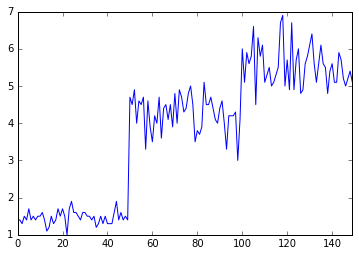

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
df['petal_length'].plot()
plt.show()

Of course, you can also integrate pandas into object-oriented programming. The dataframe itself can model an "entity" that inherits properties. Here is a simple implementation of a Flower Basket using the data we have collected.

In [122]:
class FlowerBasket(object):
    
    df = pd.read_csv("iris.csv")
    revenue = 0
    
    def __init__(self,owner, price):
        self.owner = owner
        self.price = price
        
    def sellVirginica(cls, quantity, pricePerUnit):
        if (quantity > len(cls.df[cls.df['species'] == 'virginica'])):
            return False
        else:
            #randomly picks a quantity of virginica rows to discard
            sold = cls.df[cls.df['species'] == 'virginica'].sample(quantity)
            cls.df.drop(cls.df.index[sold.index.tolist()], inplace=True)
            cls.revenue += pricePerUnit * quantity
            print("Sale of {0} virginica flowers executed!".format(quantity))
            return True
    

We create an instance of FlowerBasket called Yu, with owner "Yu" and total price of 500

In [126]:
Yu = FlowerBasket("Yu", 500.0)

Let's sell 1 virginica flower at a price of 5 dollars:

In [127]:
print("Yu Chen has earned ${0} so far".format(Yu.revenue))
Yu.sellVirginica(quantity=1,pricePerUnit=5)

Yu Chen has earned $0 so far
Sale of 1 virginica flowers executed!


True

In [128]:
print("Yu Chen has earned ${0} so far".format(Yu.revenue))

Yu Chen has earned $5 so far


These are just simple examples that barely touch the surface of pandas' core data science methods. Let me know if you want to learn more and I can create a longer tutorial with much more advanced functionality!

Thanks for reading.